In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2,n_clusters_per_class = 1, n_redundant = 0)

In [10]:
data = pd.DataFrame(X)
data['target'] = pd.DataFrame(y)

In [11]:
data

,0,1,target
0,0.063170,0.814744,1
1,-0.242653,-2.861635,0
2,1.591783,-0.244856,0
3,2.015979,0.617893,1
4,1.481697,-0.586309,0
...,...,...,...
995,2.055318,0.187158,0
996,0.189842,-2.028308,0
997,1.006213,0.503195,1
998,0.938506,-0.898216,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

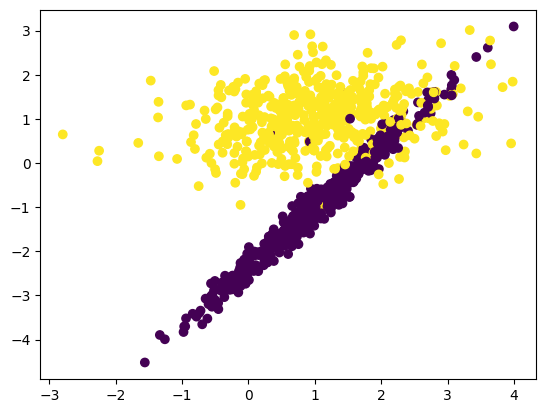

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data[0],data[1], c = data['target'])

In [22]:
from sklearn.svm import SVC
linear = SVC(kernel = 'linear')
linear.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
y_pred = linear.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.885
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       110
           1       0.85      0.91      0.88        90

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



In [25]:
linear.coef_

array([[-1.92032704,  2.0806496 ]])

In [27]:
rbf = SVC(kernel = 'rbf')
rbf.fit(X_train,y_train)

SVC()

In [28]:
y_pred = rbf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

0.89
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       105
           1       0.88      0.89      0.89        95

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [30]:
poly = SVC(kernel = 'poly')
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [31]:
y_pred = poly.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

0.885
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        98
           1       0.91      0.86      0.88       102

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [32]:
sigmoid = SVC(kernel = 'sigmoid')
sigmoid.fit(X_train,y_train)


SVC(kernel='sigmoid')

In [33]:
y_pred = sigmoid.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

0.82
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       121
           1       0.72      0.89      0.80        79

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.84      0.82      0.82       200



In [35]:
sigmoid.intercept_

array([0.86531024])

# Hyper parameter Tuning for SVM

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {
    'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [41]:
gsv = GridSearchCV(estimator= SVC(), param_grid = params, scoring = 'accuracy', cv = 5, refit = True)


In [42]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [43]:
gsv.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
gsv.best_score_

0.9475

In [45]:
y_pred = gsv.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

0.92
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       115
           1       0.86      0.98      0.91        85

    accuracy                           0.92       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.92      0.92       200

